# Exploratory Data Analysis (EDA) dari Data hasil Transform

In [21]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the dataset
products_used_features = pd.read_csv('../data/products_used_features.csv')
products_extracted_features = pd.read_csv('../data/products_extracted_features.csv')
products_integrated_features = pd.read_excel('../data/products_integrated_features.xlsx')

## products_used_features

In [5]:
# Dataset products_used_features
products_used_features.head()

,url,product_name,brand,category,price,rating,total_reviews,description,review,skin_type,age,rating_star,recommended
0,https://reviews.femaledaily.com/products/clean...,Gokujyun Ultimate Moisturizing Lotion,Hada Labo,Cleanser / Toner,29000,4.4,5928,DESCRIPTION Hada Labo Gokujyun Ultimate Moistu...,"sorry aku kurang cocok sama produk ini, karena...",Dry,18 and Under,3.0,False
1,https://reviews.femaledaily.com/products/clean...,Gokujyun Ultimate Moisturizing Lotion,Hada Labo,Cleanser / Toner,29000,4.4,5928,DESCRIPTION Hada Labo Gokujyun Ultimate Moistu...,"dipake buat csm-an enak bgt, teksturnya cair, ...",Combination,19 - 24,5.0,True
2,https://reviews.femaledaily.com/products/clean...,Gokujyun Ultimate Moisturizing Lotion,Hada Labo,Cleanser / Toner,29000,4.4,5928,DESCRIPTION Hada Labo Gokujyun Ultimate Moistu...,"Luvvvv banget, calming muka kalo lagi rewel, l...",Combination,18 and Under,5.0,True
3,https://reviews.femaledaily.com/products/clean...,Gokujyun Ultimate Moisturizing Lotion,Hada Labo,Cleanser / Toner,29000,4.4,5928,DESCRIPTION Hada Labo Gokujyun Ultimate Moistu...,produk ini tu menurut aku cocok nya buat yang ...,Oily,18 and Under,3.0,False
4,https://reviews.femaledaily.com/products/clean...,Gokujyun Ultimate Moisturizing Lotion,Hada Labo,Cleanser / Toner,29000,4.4,5928,DESCRIPTION Hada Labo Gokujyun Ultimate Moistu...,"Di aku cukip bantu Lembab tapi g kyk yg, woww ...",Dry,18 and Under,4.0,True


In [6]:
# Cek information about the dataset
products_used_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111635 entries, 0 to 111634
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   url            111635 non-null  object 
 1   product_name   111635 non-null  object 
 2   brand          111635 non-null  object 
 3   category       111635 non-null  object 
 4   price          111635 non-null  int64  
 5   rating         111635 non-null  float64
 6   total_reviews  111635 non-null  int64  
 7   description    111169 non-null  object 
 8   review         111563 non-null  object 
 9   skin_type      107568 non-null  object 
 10  age            111385 non-null  object 
 11  rating_star    111564 non-null  float64
 12  recommended    100222 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 11.1+ MB


In [7]:
# Cek jumlah data
print(f"Jumlah data pada products_used_features: {len(products_used_features)}")

Jumlah data pada products_used_features: 111635


In [8]:
# Cek data yang hilang
print("Data yang hilang pada products_used_features:")
print(products_used_features.isnull().sum())

Data yang hilang pada products_used_features:
url                  0
product_name         0
brand                0
category             0
price                0
rating               0
total_reviews        0
description        466
review              72
skin_type         4067
age                250
rating_star         71
recommended      11413
dtype: int64


In [9]:
# Cek data duplikat
print(f"Jumlah data duplikat pada products_used_features: {products_used_features.duplicated().sum()}")

Jumlah data duplikat pada products_used_features: 66


# products_extracted_features

In [10]:
# Dataset products_extracted_features
products_extracted_features.head()

,url,product_name,brand,category,price,rating,total_reviews,description,review,skin_type,age,rating_star,recommended,text_combined,found_ingredients,found_skin_concern,found_skin_goal,std_skin_concern,std_ingredients,std_skin_goal
0,https://reviews.femaledaily.com/products/clean...,Gokujyun Ultimate Moisturizing Lotion,Hada Labo,Toner,29000,4.4,5928,DESCRIPTION Hada Labo Gokujyun Ultimate Moistu...,"dipake buat csm-an enak bgt, teksturnya cair, ...",['combination'],19 - 24,5,True,"dipake buat csm-an enak bgt, teksturnya cair, ...",hyaluronic acid,"jerawat, acne",NaN,acne,hyaluronic acid,NaN
1,https://reviews.femaledaily.com/products/clean...,Gokujyun Ultimate Moisturizing Lotion,Hada Labo,Toner,29000,4.4,5928,DESCRIPTION Hada Labo Gokujyun Ultimate Moistu...,"Luvvvv banget, calming muka kalo lagi rewel, l...",['combination'],18 and Under,5,True,"luvvvv banget, calming muka kalo lagi rewel, l...",hyaluronic acid,kemerahan,calming,redness,hyaluronic acid,calming
2,https://reviews.femaledaily.com/products/clean...,Gokujyun Ultimate Moisturizing Lotion,Hada Labo,Toner,29000,4.4,5928,DESCRIPTION Hada Labo Gokujyun Ultimate Moistu...,"Di aku cukip bantu Lembab tapi g kyk yg, woww ...",['dry'],18 and Under,4,True,"di aku cukip bantu lembab tapi g kyk yg, woww ...",hyaluronic acid,NaN,NaN,NaN,hyaluronic acid,NaN
3,https://reviews.femaledaily.com/products/clean...,Gokujyun Ultimate Moisturizing Lotion,Hada Labo,Toner,29000,4.4,5928,DESCRIPTION Hada Labo Gokujyun Ultimate Moistu...,moisturizer yg ringan dan cepat meresap. pake ...,['oily'],30 - 34,5,True,moisturizer yg ringan dan cepat meresap. pake ...,hyaluronic acid,NaN,cepat meresap,NaN,hyaluronic acid,fast-absorbing
4,https://reviews.femaledaily.com/products/clean...,Gokujyun Ultimate Moisturizing Lotion,Hada Labo,Toner,29000,4.4,5928,DESCRIPTION Hada Labo Gokujyun Ultimate Moistu...,Awalnya kulitku benar-benar kering & terasa ka...,['dry'],19 - 24,5,True,awalnya kulitku benar-benar kering & terasa ka...,hyaluronic acid,kulit kering,NaN,dryness,hyaluronic acid,NaN


In [11]:
# Cek information about the dataset
products_extracted_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88176 entries, 0 to 88175
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   url                 88176 non-null  object 
 1   product_name        88176 non-null  object 
 2   brand               88176 non-null  object 
 3   category            88176 non-null  object 
 4   price               88176 non-null  int64  
 5   rating              88176 non-null  float64
 6   total_reviews       88176 non-null  int64  
 7   description         87761 non-null  object 
 8   review              88176 non-null  object 
 9   skin_type           88176 non-null  object 
 10  age                 88058 non-null  object 
 11  rating_star         88176 non-null  int64  
 12  recommended         88176 non-null  bool   
 13  text_combined       88176 non-null  object 
 14  found_ingredients   60103 non-null  object 
 15  found_skin_concern  58492 non-null  object 
 16  foun

In [12]:
# Cek jumlah data
print(f"Jumlah data pada products_extracted_features: {len(products_extracted_features)}")

Jumlah data pada products_extracted_features: 88176


In [13]:
# Cek missing data
print("Data yang hilang pada products_extracted_features:")
print(products_extracted_features.isnull().sum())

Data yang hilang pada products_extracted_features:
url                       0
product_name              0
brand                     0
category                  0
price                     0
rating                    0
total_reviews             0
description             415
review                    0
skin_type                 0
age                     118
rating_star               0
recommended               0
text_combined             0
found_ingredients     28073
found_skin_concern    29684
found_skin_goal       34085
std_skin_concern      29684
std_ingredients       28073
std_skin_goal         34085
dtype: int64


In [14]:
# Cek data duplikat
print(f"Jumlah data duplikat pada products_extracted_features: {products_extracted_features.duplicated().sum()}")

Jumlah data duplikat pada products_extracted_features: 53


# products_integrated_features

In [15]:
# Dataset products_integrated_features
products_integrated_features.head()

,url,product_name,brand,category,price,rating,skin_type,total_reviews,skin_concern,ingredients,skin_goal,age,rating_star
0,https://reviews.femaledaily.com/products/clean...,Air Mawar,Viva Cosmetics,Toner,4800,4.1,"['combination', 'oily']",741820,"['irritation', 'dryness', 'acne', 'sensitive',...","['aha', 'bha', 'hyaluronic acid', 'green tea',...","['calming', 'refreshing', 'glowing', 'fast-abs...",19 - 24,4.786207
1,https://reviews.femaledaily.com/products/clean...,Face Tonic,Viva Cosmetics,Toner,5000,4.0,"['dry', 'combination']",66944,"['pores', 'acne', 'irritation', 'sensitive', '...","['aloe vera', 'green tea']","['nourishing', 'refreshing', 'anti-aging', 'ca...",19 - 24,4.484375
2,https://reviews.femaledaily.com/products/clean...,Face Tonic,Viva Cosmetics,Toner,5000,3.7,"['combination', 'oily']",35724,"['acne', 'irritation', 'oiliness', 'pores', 'r...","['vitamin c', 'green tea']","['oil-control', 'refreshing', 'calming']",19 - 24,4.461538
3,https://reviews.femaledaily.com/products/treat...,Acne Lotion,Viva Cosmetics,Acne treatment,5150,3.7,"['combination', 'oily']",17776,"['acne', 'redness', 'oiliness', 'blackheads', ...","['zinc', 'tea tree', 'vitamin c']","['scar-fading', 'calming']",19 - 24,4.297030
4,https://reviews.femaledaily.com/products/clean...,Astringent,Viva Cosmetics,Toner,5300,3.8,"['oily', 'combination']",131544,"['acne', 'irritation', 'oiliness', 'pores', 'b...",['green tea'],"['pore-minimizing', 'refreshing', 'calming', '...",19 - 24,4.342593


In [16]:
# Cek information about the dataset
products_integrated_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   url            918 non-null    object 
 1   product_name   918 non-null    object 
 2   brand          918 non-null    object 
 3   category       918 non-null    object 
 4   price          918 non-null    int64  
 5   rating         918 non-null    float64
 6   skin_type      918 non-null    object 
 7   total_reviews  918 non-null    int64  
 8   skin_concern   918 non-null    object 
 9   ingredients    918 non-null    object 
 10  skin_goal      918 non-null    object 
 11  age            918 non-null    object 
 12  rating_star    918 non-null    float64
dtypes: float64(2), int64(2), object(9)
memory usage: 93.4+ KB


In [17]:
# Cek jumlah data
print(f"Jumlah data pada products_integrated_features : {len(products_integrated_features)}")

Jumlah data pada products_integrated_features : 918


In [18]:
# Cek missing data
print("Data yang hilang pada products_integrated_features:")
print(products_integrated_features.isnull().sum())

Data yang hilang pada products_integrated_features:
url              0
product_name     0
brand            0
category         0
price            0
rating           0
skin_type        0
total_reviews    0
skin_concern     0
ingredients      0
skin_goal        0
age              0
rating_star      0
dtype: int64


In [19]:
# Cek data duplikat
print(f"Jumlah data duplikat pada products_integrated_features: {products_integrated_features.duplicated().sum()}")

Jumlah data duplikat pada products_integrated_features: 0


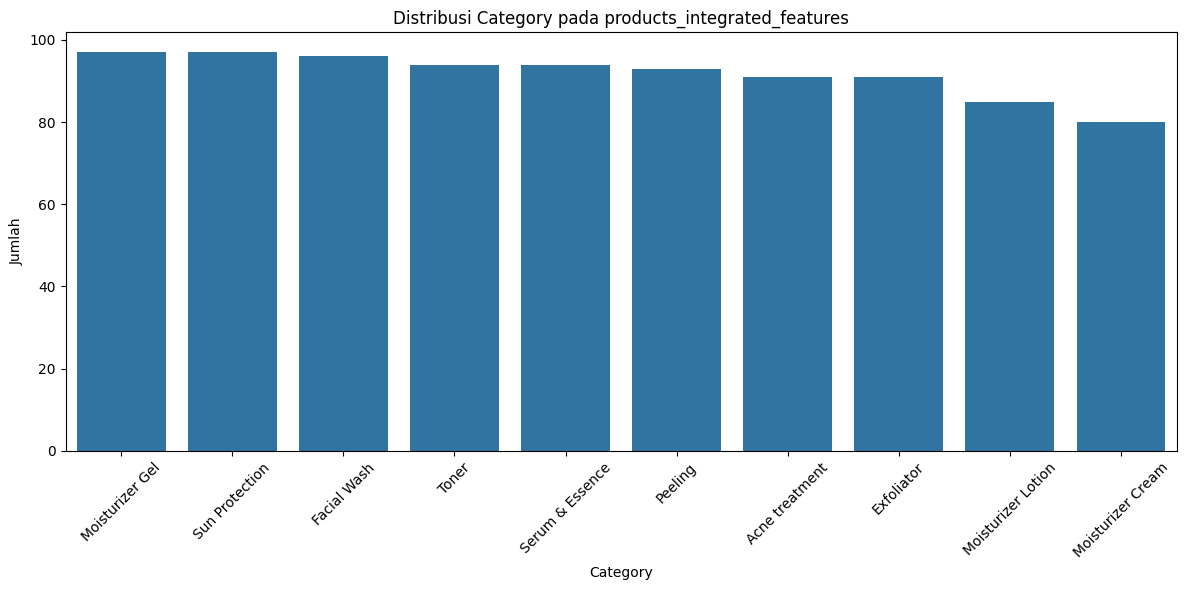

In [22]:
# Visualisasi distribusi categories pada products_integrated_features
plt.figure(figsize=(12, 6))
sns.countplot(data=products_integrated_features, x='category', order=products_integrated_features['category'].value_counts().index)
plt.title('Distribusi Category pada products_integrated_features')
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()

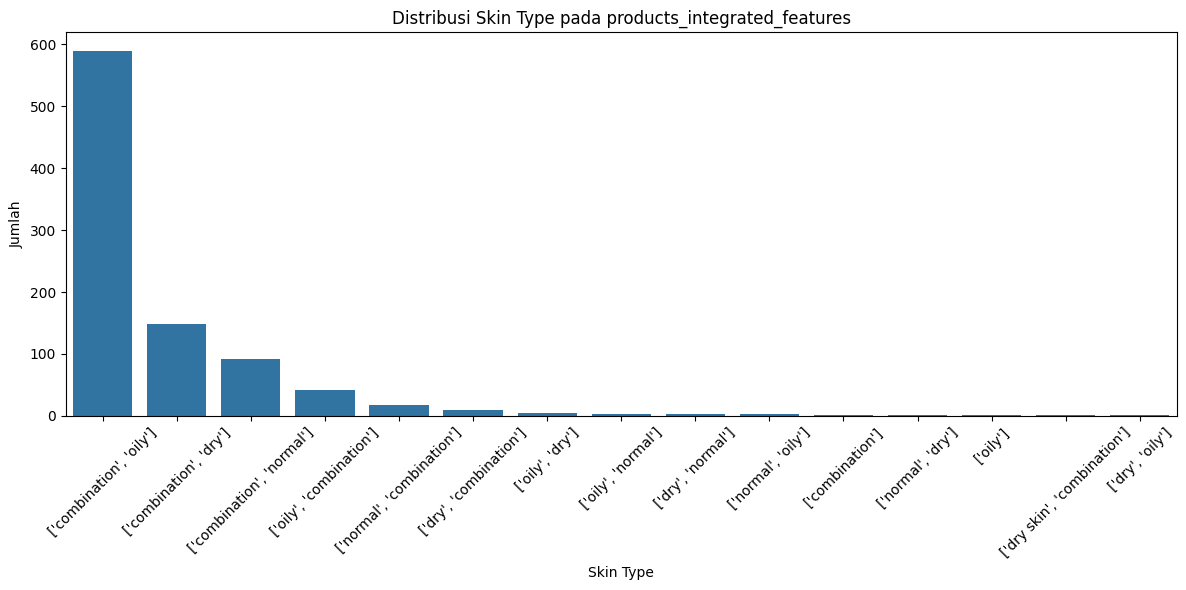

In [23]:
# Visualisasi distribusi skin_type pada products_integrated_features
plt.figure(figsize=(12, 6))
sns.countplot(data=products_integrated_features, x='skin_type', order=products_integrated_features['skin_type'].value_counts().index)
plt.title('Distribusi Skin Type pada products_integrated_features')
plt.xticks(rotation=45)
plt.xlabel('Skin Type')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()

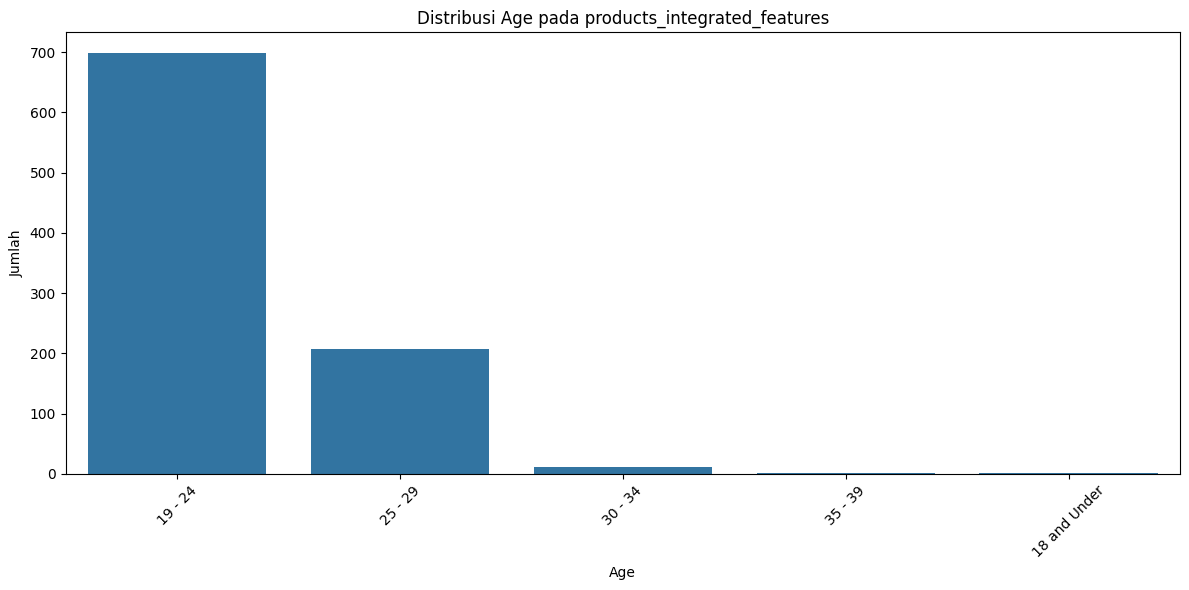

In [24]:
# Visualisasi distribusi age pada products_integrated_features
plt.figure(figsize=(12, 6))
sns.countplot(data=products_integrated_features, x='age', order=products_integrated_features['age'].value_counts().index)
plt.title('Distribusi Age pada products_integrated_features')
plt.xticks(rotation=45)
plt.xlabel('Age')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()